In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('GlobalTerrorism.csv',low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [2]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'CountryName',
                   'provstate':'State', 'country':'CountryCode','region':'RegionCode','city':'City','latitude':'Latitude',
                   'longitude':'Longitude','region_txt':'RegionName','attacktype1_txt':'AttackType','target1':'Specific_Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1':'TargetCode',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','weaptype1':'WeaponCode','motive':'Motive'},
          inplace=True)

df=df[['Year','Month','Day','Extended','CountryCode','CountryName','State','RegionCode','RegionName','City','Latitude',
       'Longitude','AttackType','Killed','Wounded','Specific_Target','TargetCode','Target_type','Summary','Group',
       'WeaponCode','Weapon_type','Motive']]

In [3]:
df.sample(4)

,Year,Month,Day,Extended,CountryCode,CountryName,State,RegionCode,RegionName,City,...,Killed,Wounded,Specific_Target,TargetCode,Target_type,Summary,Group,WeaponCode,Weapon_type,Motive
18940,1983,5,30,0,61,El Salvador,Morazan,2,Central America & Caribbean,Jocoaitique,...,1.0,8.0,township of Jocaitique,14,Private Citizens & Property,NaN,Farabundo Marti National Liberation Front (FMLN),6,Explosives,NaN
96491,2010,5,14,0,41,Central African Republic,Mbomou,11,Sub-Saharan Africa,Dembia,...,2.0,0.0,Civilians,14,Private Citizens & Property,"05/14/2010: On Friday afternoon around 1600, i...",Lord's Resistance Army (LRA),13,Unknown,The specific motive for the attack is unknown.
1737,1973,2,2,0,11,Argentina,Unknown,3,South America,Unknown,...,1.0,0.0,"Lt. Army Intelligence Officer, Jose M. Nacarratto",4,Military,NaN,Unknown,5,Firearms,NaN
49895,1992,1,22,0,603,United Kingdom,Northern Ireland,8,Western Europe,Londonderry,...,0.0,0.0,bank,1,Business,NaN,Irish Republican Army (IRA),6,Explosives,NaN


In [4]:
df['RegionName'].value_counts() 

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: RegionName, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Middle East & North Africa'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Western Europe'),
  Text(5, 0, 'Southeast Asia'),
  Text(6, 0, 'Central America & Caribbean'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'North America'),
  Text(9, 0, 'East Asia'),
  Text(10, 0, 'Central Asia'),
  Text(11, 0, 'Australasia & Oceania')])

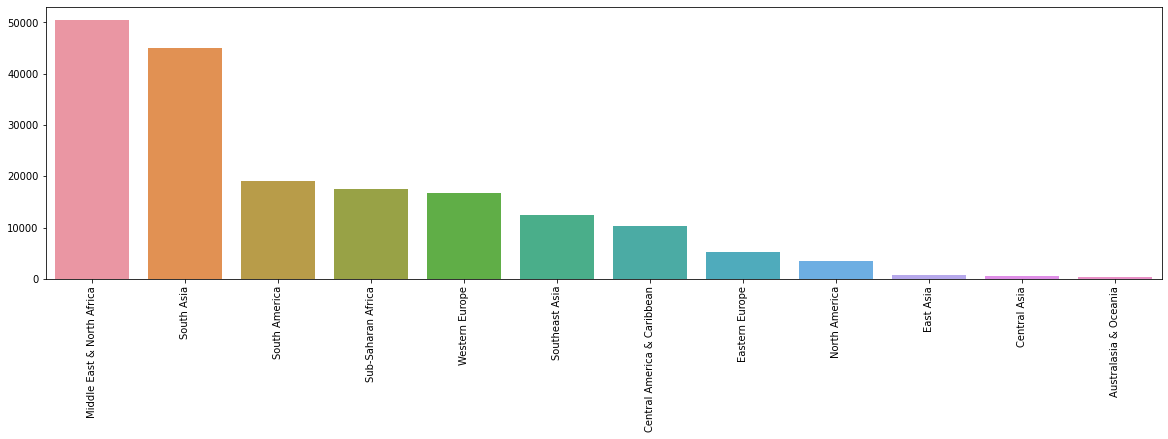

In [5]:
plt.figure(figsize = (20,5))
sns.barplot(df['RegionName'].value_counts()[:12].index,df['RegionName'].value_counts()[:12].values)
plt.xticks(rotation = 90)

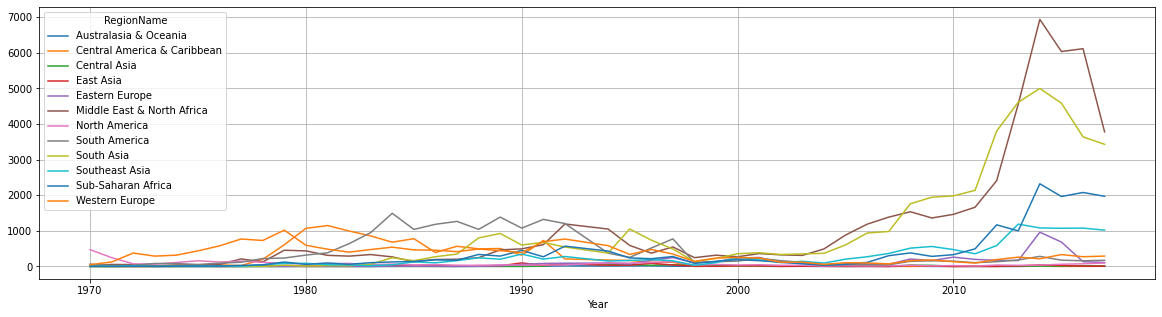

In [6]:
pd.crosstab(df.Year, df.RegionName).plot(kind='line',figsize=(20,5))
plt.grid()

In [7]:
df['CountryName'].value_counts() 

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: CountryName, Length: 205, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'El Salvador'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Somalia'),
  Text(11, 0, 'Nigeria'),
  Text(12, 0, 'Thailand'),
  Text(13, 0, 'Yemen'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'United States'),
  Text(17, 0, 'Algeria'),
  Text(18, 0, 'France'),
  Text(19, 0, 'Egypt')])

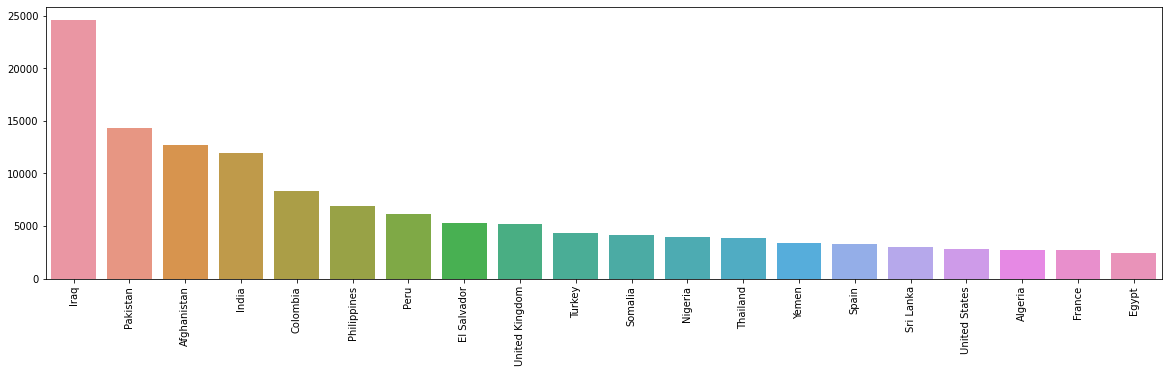

In [8]:
plt.figure(figsize = (20,5))
sns.barplot(df['CountryName'].value_counts()[:20].index,df['CountryName'].value_counts()[:20].values)
plt.xticks(rotation = 90)

In [9]:
df['State'].value_counts() 

Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: State, Length: 2855, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Baghdad'),
  Text(1, 0, 'Northern Ireland'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Balochistan'),
  Text(4, 0, 'Saladin'),
  Text(5, 0, 'Al Anbar'),
  Text(6, 0, 'Nineveh'),
  Text(7, 0, 'Sindh'),
  Text(8, 0, 'Khyber Pakhtunkhwa'),
  Text(9, 0, 'Diyala'),
  Text(10, 0, 'Lima'),
  Text(11, 0, 'Jammu and Kashmir'),
  Text(12, 0, 'Federally Administered Tribal Areas'),
  Text(13, 0, 'San Salvador'),
  Text(14, 0, 'Antioquia'),
  Text(15, 0, 'Punjab'),
  Text(16, 0, 'Kirkuk'),
  Text(17, 0, 'Santiago Metropolitan'),
  Text(18, 0, 'Banaadir'),
  Text(19, 0, 'West Bank')])

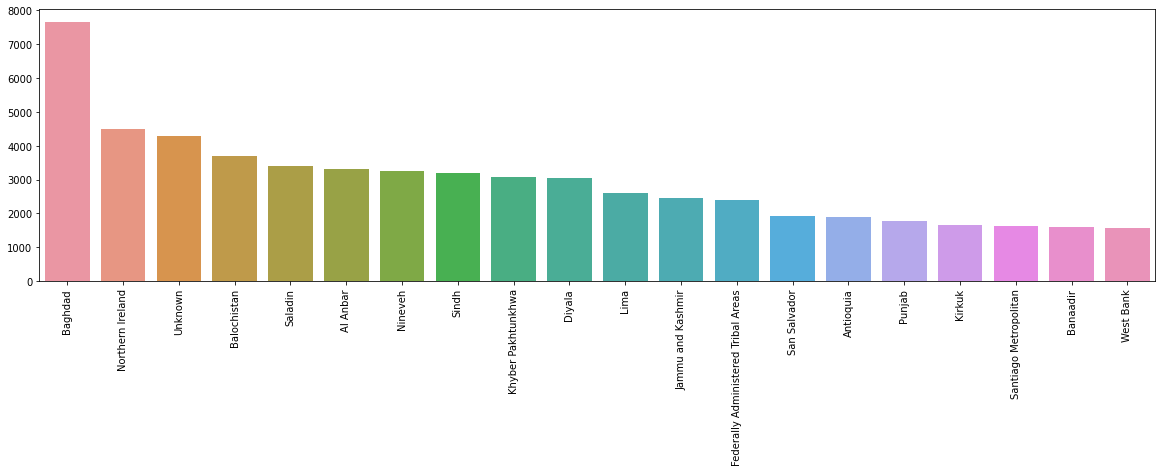

In [10]:
plt.figure(figsize = (20,5))
sns.barplot(df['State'].value_counts()[:20].index,df['State'].value_counts()[:20].values)
plt.xticks(rotation = 90)

In [11]:
df['City'].value_counts() 

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: City, Length: 36674, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Baghdad'),
  Text(2, 0, 'Karachi'),
  Text(3, 0, 'Lima'),
  Text(4, 0, 'Mosul'),
  Text(5, 0, 'Belfast'),
  Text(6, 0, 'Santiago'),
  Text(7, 0, 'Mogadishu'),
  Text(8, 0, 'San Salvador'),
  Text(9, 0, 'Istanbul'),
  Text(10, 0, 'Athens'),
  Text(11, 0, 'Bogota'),
  Text(12, 0, 'Kirkuk'),
  Text(13, 0, 'Beirut'),
  Text(14, 0, 'Medellin'),
  Text(15, 0, 'Benghazi'),
  Text(16, 0, 'Peshawar'),
  Text(17, 0, 'Quetta'),
  Text(18, 0, 'Guatemala City'),
  Text(19, 0, 'Baqubah')])

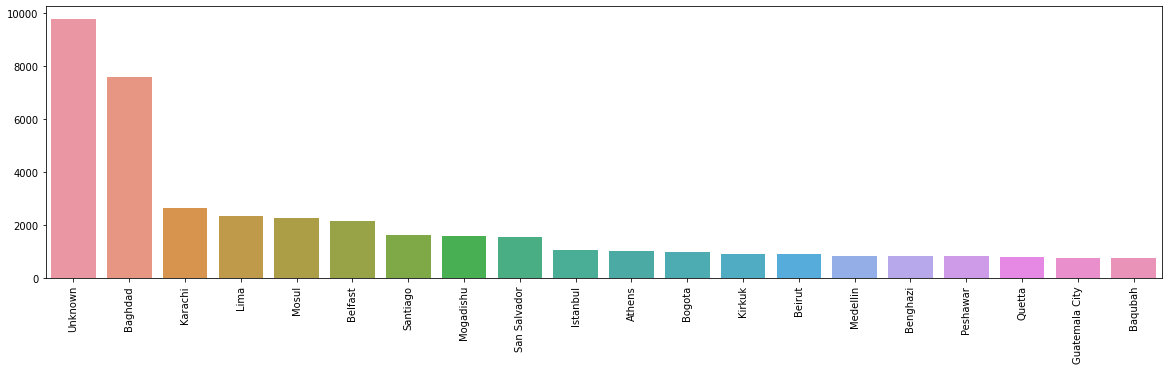

In [12]:
plt.figure(figsize = (20,5))
sns.barplot(df['City'].value_counts()[:20].index,df['City'].value_counts()[:20].values)
plt.xticks(rotation = 90)

<AxesSubplot:>

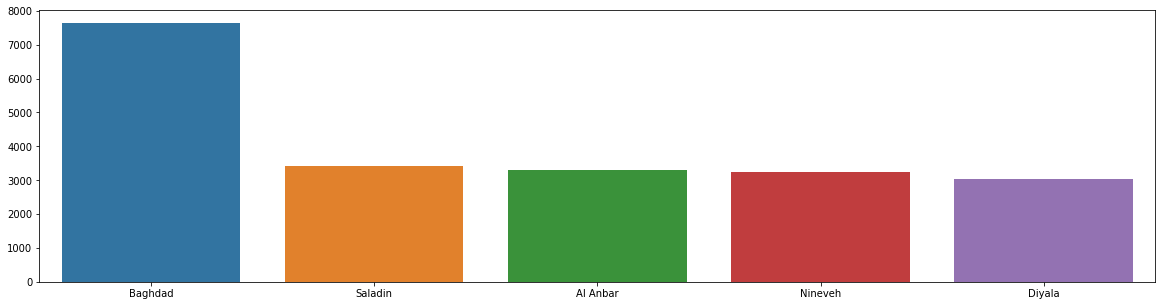

In [13]:
df_st1=df[df['CountryName']=='Iraq']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st1.value_counts()[:5].index,df_st1.value_counts()[:5].values)

<AxesSubplot:>

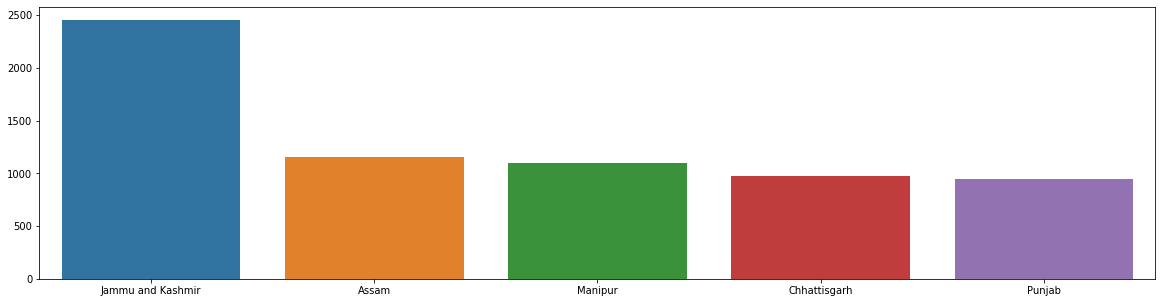

In [14]:
df_st2=df[df['CountryName']=='India']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st2.value_counts()[:5].index,df_st2.value_counts()[:5].values)

<AxesSubplot:>

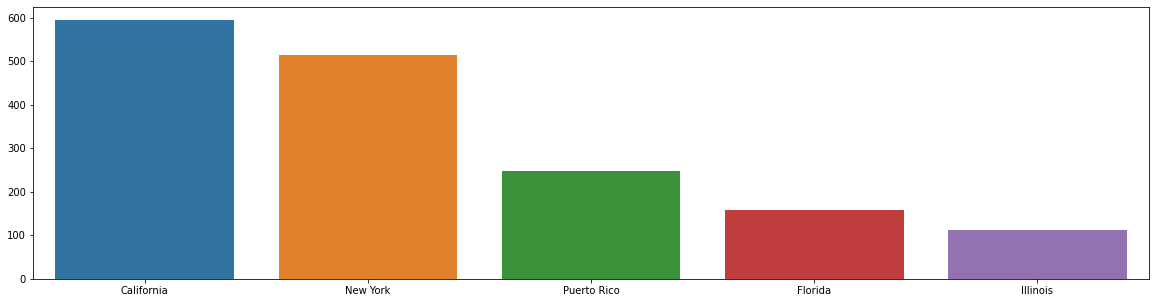

In [15]:
df_st3=df[df['CountryName']=='United States']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st3.value_counts()[:5].index,df_st3.value_counts()[:5].values)

<AxesSubplot:>

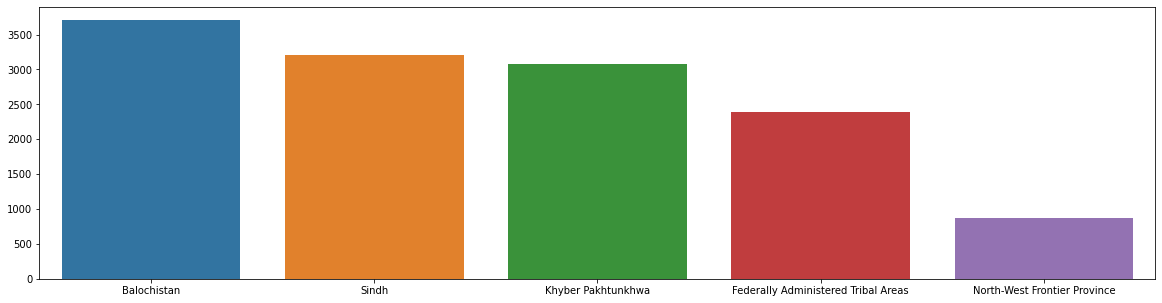

In [16]:
df_st4=df[df['CountryName']=='Pakistan']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st4.value_counts()[:5].index,df_st4.value_counts()[:5].values)

<AxesSubplot:>

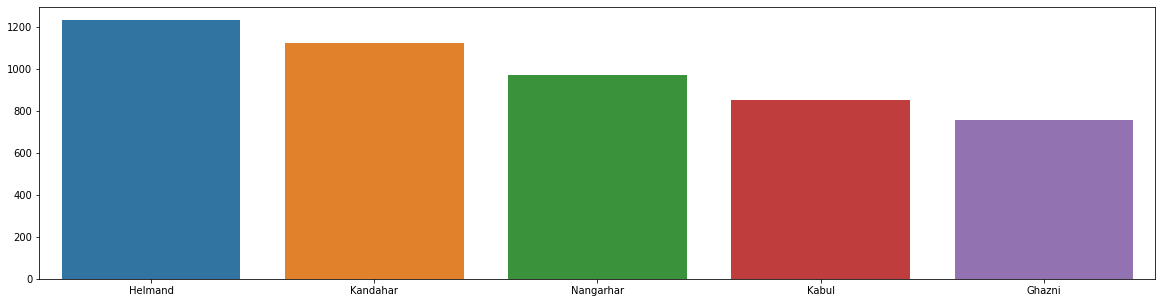

In [17]:
df_st5=df[df['CountryName']=='Afghanistan']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st5.value_counts()[:5].index,df_st5.value_counts()[:5].values)

<AxesSubplot:>

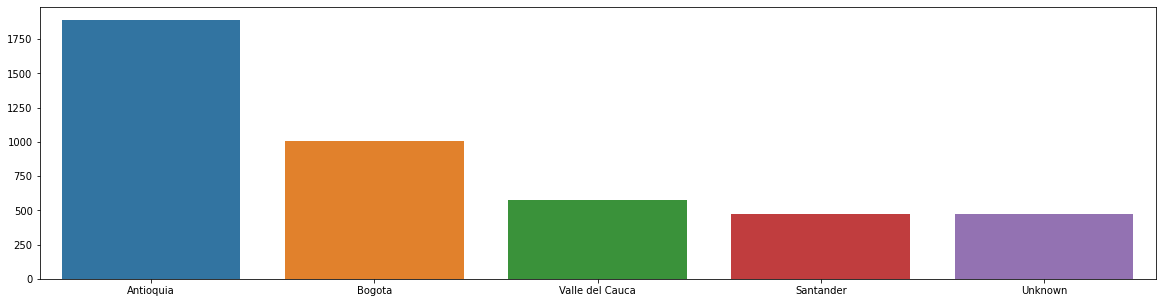

In [18]:
df_st6=df[df['CountryName']=='Colombia']['State']
plt.figure(figsize = (20,5))
sns.barplot(df_st6.value_counts()[:5].index,df_st6.value_counts()[:5].values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

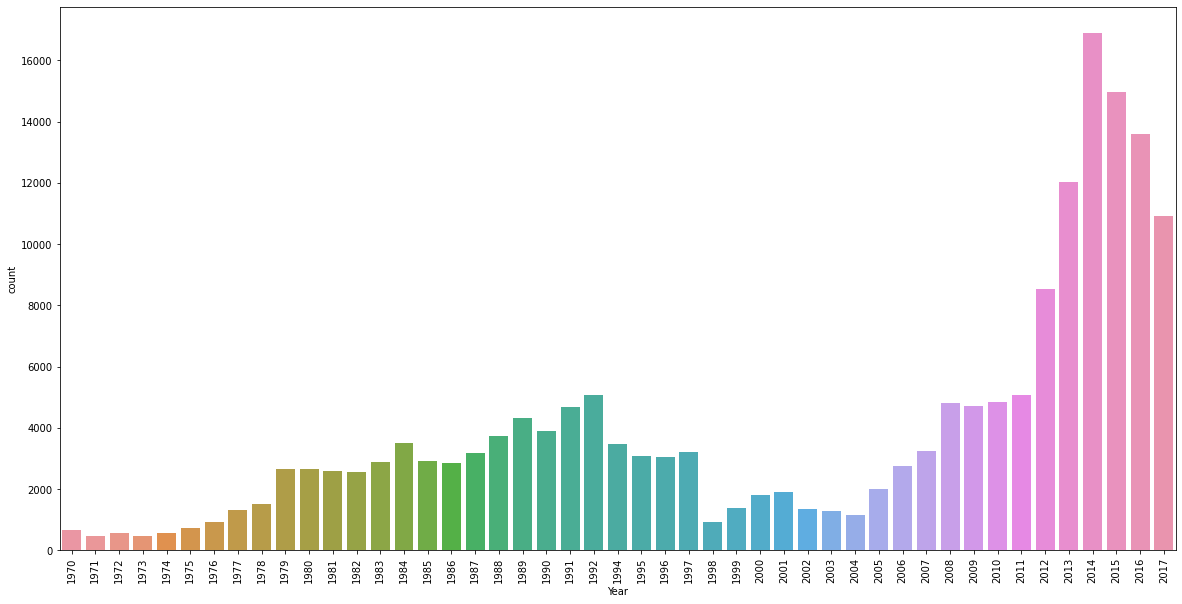

In [19]:
plt.figure(figsize = (20,10))
sns.countplot('Year',data=df)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Bombing/Explosion'),
  Text(1, 0, 'Armed Assault'),
  Text(2, 0, 'Assassination'),
  Text(3, 0, 'Hostage Taking (Kidnapping)'),
  Text(4, 0, 'Facility/Infrastructure Attack'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Unarmed Assault'),
  Text(7, 0, 'Hostage Taking (Barricade Incident)'),
  Text(8, 0, 'Hijacking')])

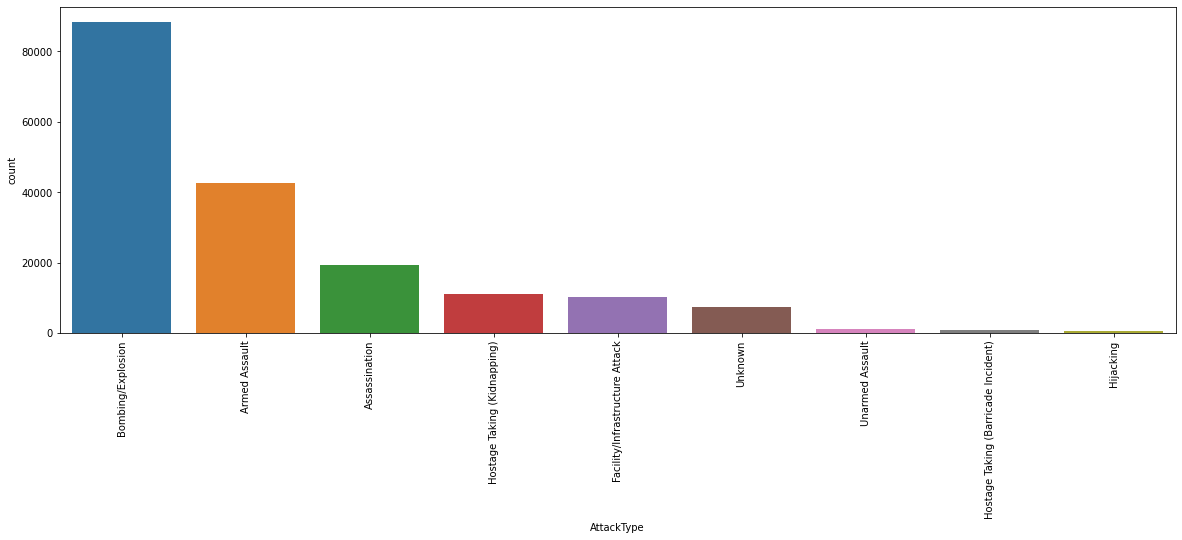

In [20]:
plt.figure(figsize = (20,6))
sns.countplot(df['AttackType'],order = df['AttackType'].value_counts().index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Government (General)'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Religious Figures/Institutions'),
  Text(9, 0, 'Educational Institution'),
  Text(10, 0, 'Government (Diplomatic)'),
  Text(11, 0, 'Terrorists/Non-State Militia'),
  Text(12, 0, 'Journalists & Media'),
  Text(13, 0, 'Violent Political Party'),
  Text(14, 0, 'Airports & Aircraft'),
  Text(15, 0, 'Telecommunication'),
  Text(16, 0, 'NGO'),
  Text(17, 0, 'Tourists'),
  Text(18, 0, 'Maritime'),
  Text(19, 0, 'Food or Water Supply'),
  Text(20, 0, 'Abortion Related'),
  Text(21, 0, 'Other')])

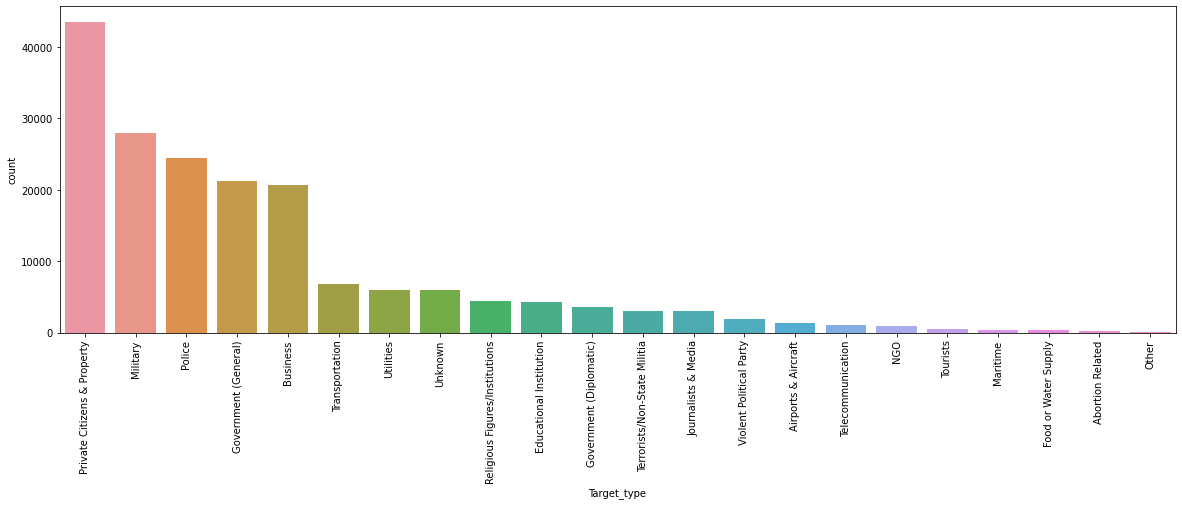

In [21]:
plt.figure(figsize = (20,6))
sns.countplot(x="Target_type", data=df, order=df["Target_type"].value_counts().index)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Taliban'),
  Text(2, 0, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(3, 0, 'Shining Path (SL)'),
  Text(4, 0, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(5, 0, 'Al-Shabaab'),
  Text(6, 0, "New People's Army (NPA)"),
  Text(7, 0, 'Irish Republican Army (IRA)'),
  Text(8, 0, 'Revolutionary Armed Forces of Colombia (FARC)'),
  Text(9, 0, 'Boko Haram')])

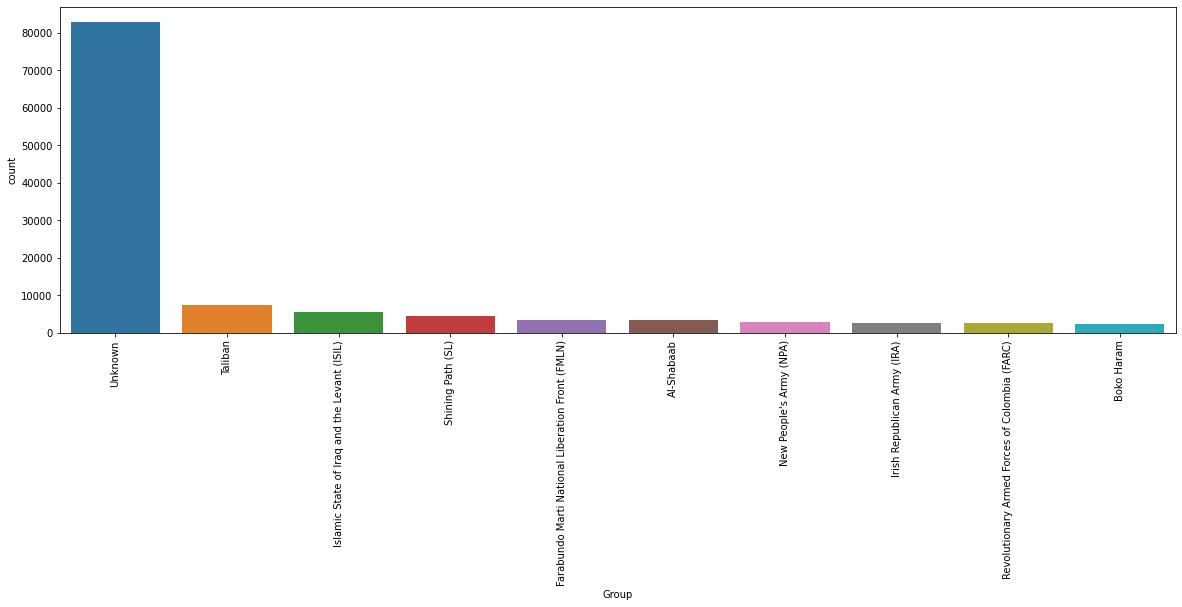

In [22]:
plt.figure(figsize = (20,6))
sns.countplot(x="Group", data=df, order=df["Group"].value_counts()[:10].index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Explosives'),
  Text(1, 0, 'Firearms'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Incendiary'),
  Text(4, 0, 'Melee'),
  Text(5, 0, 'Chemical'),
  Text(6, 0, 'Sabotage Equipment'),
  Text(7, 0, 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Biological'),
  Text(10, 0, 'Fake Weapons'),
  Text(11, 0, 'Radiological')])

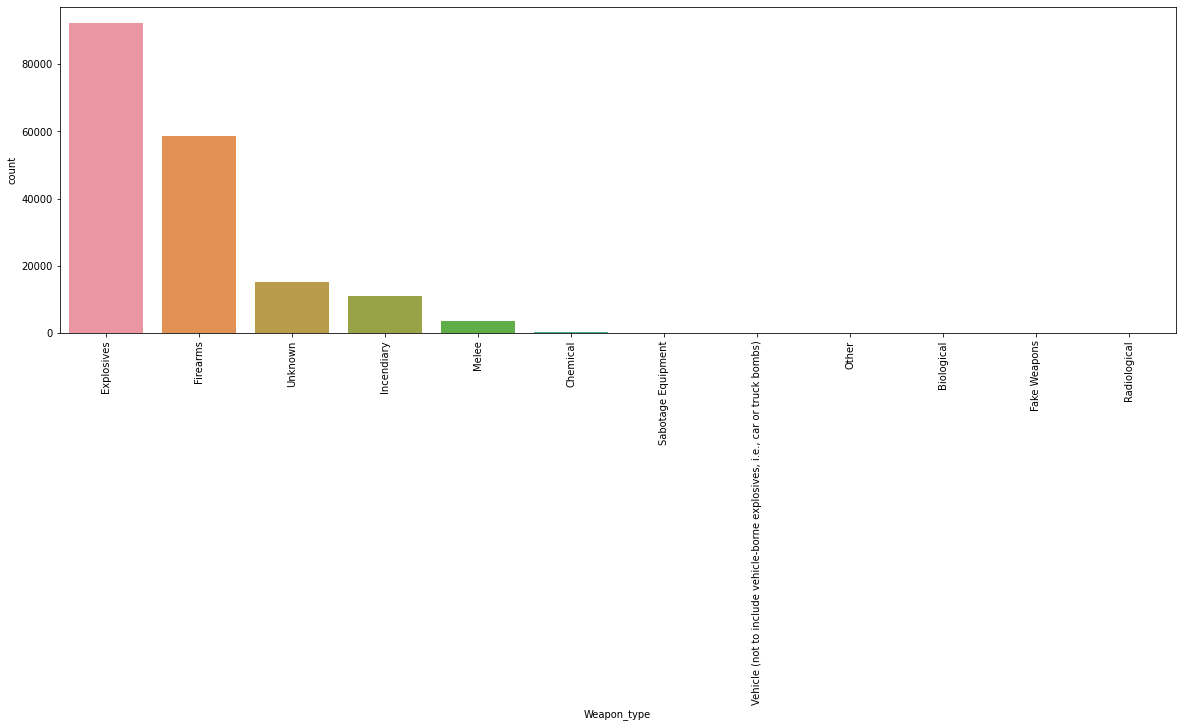

In [23]:
plt.figure(figsize = (20,6))
sns.countplot(df['Weapon_type'],order = df['Weapon_type'].value_counts()[:15].index)
plt.xticks(rotation = 90)